#  Importing Libraries

In [1]:
# Importing Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
from datetime import datetime as dt

import pickle
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [26]:
tf.config.list_physical_devices('GPU')

# tf.config.set_visible_devices([], 'GPU')

# Place tensors on the GPU
tf.device('GPU:0')

In [31]:
import torch

In [33]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [36]:
device = get_default_device()
device

device(type='cpu')

In [4]:
data_dir = r'C:\Users\surya\OneDrive\Desktop\Imarticus - Python\Deep Learning\Project\Traffic_signs\traffic_sign_classification_dataset\train'

#  Loading Images

In [5]:
datagenerator = {
    "train": ImageDataGenerator(horizontal_flip=True,
                                vertical_flip=True,
                                rescale=1. / 255,
                                zoom_range=0.1,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                rotation_range=30,
                               ).flow_from_directory(directory=data_dir,
                                                     target_size=(300, 300),
                                                     subset='training',
                                                    ),

    "valid": ImageDataGenerator(rescale=1 / 255,
                                validation_split=0.1,
                               ).flow_from_directory(directory=data_dir,
                                                     target_size=(300, 300),
                                                     subset='validation',
                                                    ),
}

Found 4031 images belonging to 85 classes.
Found 407 images belonging to 85 classes.


In [24]:
batch_size = 32
epochs = 100

train_generator = datagenerator["train"]
valid_generator = datagenerator["valid"]

#  Model Training


In [42]:
filepath = "./model_{epoch:02d}-{val_accuracy:.2f}.h5"

checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint1]
# Training the Model

print("Training Started at : ", dt.now())
print("\n\n\n -------------------------------------------------------------- \n\n")
history = model.fit_generator(generator=train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch,
                              validation_data=valid_generator, validation_steps=validation_steps,
                              callbacks=callbacks_list)

print("\n\n\n -------------------------------------------------------------- \n\n")
print("Training Ended at : ", dt.now())

Training Started at :  2023-12-14 22:37:34.813565



 -------------------------------------------------------------- 


Epoch 1/100
125/125 [==============================] - ETA: 0s - loss: 0.9822 - accuracy: 0.7152
Epoch 1: val_accuracy improved from -inf to 0.52083, saving model to .\model_01-0.52.h5
125/125 [==============================] - 274s 2s/step - loss: 0.9822 - accuracy: 0.7152 - val_loss: 1.6999 - val_accuracy: 0.5208
Epoch 2/100
125/125 [==============================] - ETA: 0s - loss: 0.9607 - accuracy: 0.7134
Epoch 2: val_accuracy did not improve from 0.52083
125/125 [==============================] - 232s 2s/step - loss: 0.9607 - accuracy: 0.7134 - val_loss: 1.7212 - val_accuracy: 0.5104
Epoch 3/100
125/125 [==============================] - ETA: 0s - loss: 0.9148 - accuracy: 0.7262
Epoch 3: val_accuracy did not improve from 0.52083
125/125 [==============================] - 230s 2s/step - loss: 0.9148 - accuracy: 0.7262 - val_loss: 1.6432 - val_accuracy: 0.5130
Epo

125/125 [==============================] - 233s 2s/step - loss: 0.4201 - accuracy: 0.8535 - val_loss: 1.5234 - val_accuracy: 0.5938
Epoch 57/100
125/125 [==============================] - ETA: 0s - loss: 0.4142 - accuracy: 0.8607
Epoch 57: val_accuracy improved from 0.67188 to 0.67448, saving model to .\model_57-0.67.h5
125/125 [==============================] - 240s 2s/step - loss: 0.4142 - accuracy: 0.8607 - val_loss: 1.3974 - val_accuracy: 0.6745
Epoch 58/100
125/125 [==============================] - ETA: 0s - loss: 0.4386 - accuracy: 0.8525
Epoch 58: val_accuracy did not improve from 0.67448
125/125 [==============================] - 230s 2s/step - loss: 0.4386 - accuracy: 0.8525 - val_loss: 1.3755 - val_accuracy: 0.6432
Epoch 59/100
125/125 [==============================] - ETA: 0s - loss: 0.4069 - accuracy: 0.8607
Epoch 59: val_accuracy did not improve from 0.67448
125/125 [==============================] - 232s 2s/step - loss: 0.4069 - accuracy: 0.8607 - val_loss: 1.3777 - val

125/125 [==============================] - ETA: 0s - loss: 0.3624 - accuracy: 0.8707
Epoch 85: val_accuracy did not improve from 0.70312
125/125 [==============================] - 232s 2s/step - loss: 0.3624 - accuracy: 0.8707 - val_loss: 1.3792 - val_accuracy: 0.6745
Epoch 86/100
125/125 [==============================] - ETA: 0s - loss: 0.3490 - accuracy: 0.8810
Epoch 86: val_accuracy did not improve from 0.70312
125/125 [==============================] - 237s 2s/step - loss: 0.3490 - accuracy: 0.8810 - val_loss: 1.3078 - val_accuracy: 0.6615
Epoch 87/100
125/125 [==============================] - ETA: 0s - loss: 0.3549 - accuracy: 0.8817
Epoch 87: val_accuracy did not improve from 0.70312
125/125 [==============================] - 233s 2s/step - loss: 0.3549 - accuracy: 0.8817 - val_loss: 1.2952 - val_accuracy: 0.6745
Epoch 88/100
125/125 [==============================] - ETA: 0s - loss: 0.3444 - accuracy: 0.8792
Epoch 88: val_accuracy did not improve from 0.70312
125/125 [========

#  Model Evaluation


In [44]:
# Calculate the Loss and Accuracy on the Validation Data
test_loss, test_acc = model.evaluate(valid_generator)
print('test accuracy : ', test_acc)

13/13 [==============================] - 18s 1s/step - loss: 1.2874 - accuracy: 0.6732
test accuracy :  0.6732186675071716


In [45]:
model.save('traffic.h5')

#  Model Testing


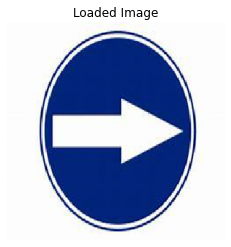

1/1 [==============================] - 0s 203ms/step


Maximum Probability:  0.35217574
Classified: COMPULSARY_KEEP_RIGHT 




In [50]:
predict(r"C:\Users\surya\OneDrive\Desktop\Imarticus - Python\Deep Learning\Project\Traffic_signs\traffic_sign_classification_dataset\test\COMPULSARY_TURN_RIGHT\16000.jpg")

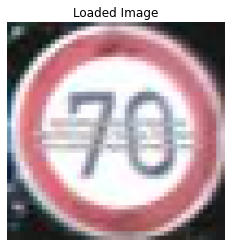

1/1 [==============================] - 0s 157ms/step


Maximum Probability:  0.70419216
Classified: SPEED_LIMIT_50 




In [54]:
predict(r"C:\Users\surya\OneDrive\Desktop\Imarticus - Python\Deep Learning\Project\Traffic_signs\traffic_sign_classification_dataset\test\SPEED_LIMIT_70\69096.jpg")

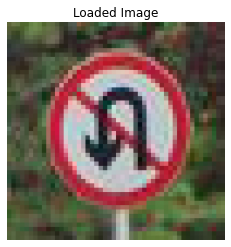

1/1 [==============================] - 0s 172ms/step


Maximum Probability:  0.78638
Classified: U_TURN_PROHIBITED 




In [53]:
predict(r"C:\Users\surya\OneDrive\Desktop\Imarticus - Python\Deep Learning\Project\Traffic_signs\traffic_sign_classification_dataset\test\U_TURN_PROHIBITED\81000.jpg")

# CONCLUSION : 

**The Dataset needs more training datapoints, considering the number of classes i.e 85, there isn't enough of training data per class to provide robust predictions.**